In [44]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

import os


# Importing lib

# Analyse Train dataset and pre-processing data 

In [45]:
plan=pd.read_csv("../input/day-plan/Day_Plan - Sheet1.csv")
plan.head(20)

,Name,Address,Rating,Website,Type,Time,Duration (minutes)
0,Global Gifts,"446 Massachusetts Ave, Indianapolis, IN 46204",4.7,https://www.globalgiftsft.com/,Gift shop,9:00,60
1,Silver In the City,"434 Massachusetts Ave, Indianapolis, IN 46204",4.7,http://www.silverinthecity.com/,Gift shop,10:00,60
2,Indianapolis Canal Walk,"Canal Walk, Indianapolis, IN 46202",4.7,https://www.whiteriverstatepark.org/,Park,11:00,120
3,Chipotle,University BLVD,4.9,https://www.whiteriverstatepark.org/,Restaurant,13:00,60
4,Lucas Oil Stadium,"500 S Capitol Ave, Indianapolis, IN 46225",4.7,http://www.lucasoilstadium.com/,Stadium,14:00,120
5,Indianapolis Zoo,"1200 W Washington St, Indianapolis, IN 46222",4.5,http://www.indianapoliszoo.com/,Zoo,16:00,120
6,Circle Shopping mall,49 W Maryland Street,NaN,https://www.circlecentre.com/?utm_source=gbp&u...,Shopping Mall,18:00,120


In [7]:
shopping_mall_list=pd.read_csv("../input/shoppingmall/shopping_mall - Sheet1.csv")
shopping_mall_list.head(10)

,Name,Address,Rating,Website,Type,Time,Duration (minutes)
0,Global Gifts,"446 Massachusetts Ave, Indianapolis, IN 46204",4.7,https://www.globalgiftsft.com/,Gift shop,9:00,60.0
1,Silver In the City,"434 Massachusetts Ave, Indianapolis, IN 46204",4.7,http://www.silverinthecity.com/,Gift shop,10:00,60.0
2,Indianapolis Canal Walk,"Canal Walk, Indianapolis, IN 46202",4.7,https://www.whiteriverstatepark.org/,Park,11:00,120.0
3,Chipotle,University BLVD,4.9,https://www.whiteriverstatepark.org/,Restaurant,13:00,60.0
4,Lucas Oil Stadium,"500 S Capitol Ave, Indianapolis, IN 46225",4.7,http://www.lucasoilstadium.com/,Stadium,14:00,120.0
5,Indianapolis Zoo,"1200 W Washington St, Indianapolis, IN 46222",4.5,http://www.indianapoliszoo.com/,Zoo,16:00,120.0
6,Shopping mall,600 S Clyde Morris BLVD,NaN,http://www.indianapoliszoo.com/,Shopping Mall,18:00,120.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Shopping mall,600 S Clyde Morris BLVD,4.2,http://www.indianapoliszoo.com/,Shopping Mall,18:00,120.0


In [9]:
shopping_mall_list.describe() #Calcuating the averatge ratings of shopping malls in Indianapolis based on the provided list 

,Rating,Duration (minutes)
count,11.000000,12.000000
mean,4.309091,105.000000
std,0.592376,27.136021
min,3.000000,60.000000
25%,4.100000,105.000000
50%,4.500000,120.000000
75%,4.700000,120.000000
max,4.900000,120.000000


In [8]:
plan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                12 non-null     object 
 1   Address             12 non-null     object 
 2   Rating              11 non-null     float64
 3   Website             12 non-null     object 
 4   Type                12 non-null     object 
 5   Time                12 non-null     object 
 6   Duration (minutes)  12 non-null     float64
dtypes: float64(2), object(5)
memory usage: 912.0+ bytes


In [4]:
plan.shape

(7, 7)

In [8]:
plan.describe()

,Rating,Duration (minutes)
count,6.000000,7.000000
mean,4.700000,94.285714
std,0.126491,32.071349
min,4.500000,60.000000
25%,4.700000,60.000000
50%,4.700000,120.000000
75%,4.700000,120.000000
max,4.900000,120.000000


In [10]:
plan.isnull().sum()

#One of the rating is missing from the plan file which is the shopping mall one, assign average shopping mall rating from the shopping_mall_list to missing shopping mall_rating in the plan

Name                  0
Address               0
Rating                1
Website               0
Type                  0
Time                  0
Duration (minutes)    0
dtype: int64

Age, Cabin and Embarked have the missing values

<AxesSubplot:>

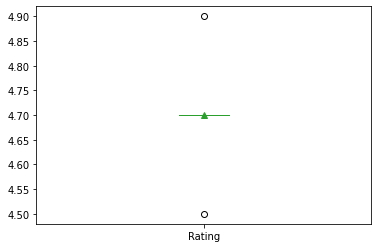

In [11]:
plan['Rating'].plot(kind='box', showmeans=True)

In [12]:
plan['Rating'].unique()

array([4.7, 4.9, 4.5, nan])

In [13]:
shopping_mall_list['Rating'].unique()

array([4.7, 4.9, 4.5, nan, 4.2, 3.5, 3. , 4. ])

In [14]:
plan['Rating'].mean()

4.7

In [16]:
shopping_mall_list['Rating'].mean()

4.309090909090909

In [19]:
plan['Rating']=plan['Rating'].fillna(4.3) #Filling the missing value of rating of shopping_mall from the plan file 

In [20]:
plan['Rating'] 

0    4.7
1    4.7
2    4.7
3    4.9
4    4.7
5    4.5
6    4.3
Name: Rating, dtype: float64

In [22]:
plan.isnull().sum() #Verifying if missing value is filled or not

Name                  0
Address               0
Rating                0
Website               0
Type                  0
Time                  0
Duration (minutes)    0
dtype: int64

In [25]:
cat_cols=['Rating','Duration (minutes)']
l = LabelEncoder() #creating a label according to rating and duration and training the data by creating those labels
for i in cat_cols:
    plan[i]=l.fit_transform(plan[i])
plan


,Name,Address,Rating,Website,Type,Time,Duration (minutes)
0,Global Gifts,"446 Massachusetts Ave, Indianapolis, IN 46204",2,https://www.globalgiftsft.com/,Gift shop,9:00,0
1,Silver In the City,"434 Massachusetts Ave, Indianapolis, IN 46204",2,http://www.silverinthecity.com/,Gift shop,10:00,0
2,Indianapolis Canal Walk,"Canal Walk, Indianapolis, IN 46202",2,https://www.whiteriverstatepark.org/,Park,11:00,1
3,Chipotle,University BLVD,3,https://www.whiteriverstatepark.org/,Restaurant,13:00,0
4,Lucas Oil Stadium,"500 S Capitol Ave, Indianapolis, IN 46225",2,http://www.lucasoilstadium.com/,Stadium,14:00,1
5,Indianapolis Zoo,"1200 W Washington St, Indianapolis, IN 46222",1,http://www.indianapoliszoo.com/,Zoo,16:00,1
6,Circle Shopping mall,49 W Maryland Street,0,https://www.circlecentre.com/?utm_source=gbp&u...,Shopping Mall,18:00,1


In [28]:
plan.corr()

,Rating,Duration (minutes)
Rating,1.000000,-0.608781
Duration (minutes),-0.608781,1.000000


In [30]:
plan.corr()['Rating'].sort_values() #Sorting the rating values of the places in the plan

Duration (minutes)   -0.608781
Rating                1.000000
Name: Rating, dtype: float64

In [31]:
plan.groupby("Rating").count()['Time']

Rating
0    1
1    1
2    4
3    1
Name: Time, dtype: int64

1 represent male and 0 representd female

<AxesSubplot:xlabel='Rating', ylabel='count'>

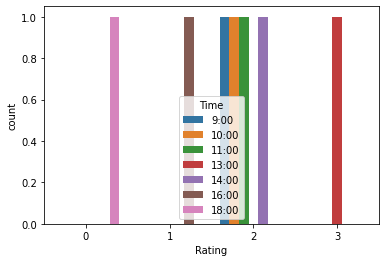

In [32]:
sns.countplot(x='Rating', hue='Time', data=plan) #Analyzing how much time we are spending at different places that have different ratings, analyzing the trend of how much time we are spending at a place as per the rating 

0
3
1.7142857142857142
AxesSubplot(0.125,0.125;0.775x0.755)


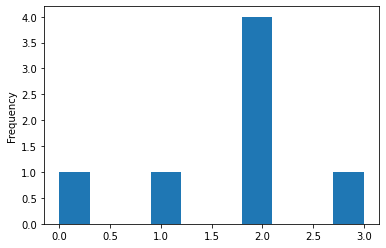

In [35]:
print(plan['Rating'].min())
print(plan['Rating'].max())
print(plan['Rating'].mean())


print(plan['Rating'].plot.hist())

The fare is lie between 0 to 512. But it is strange that the cost is 0. 

The high Pclass has the High Fare.

In [41]:
x=['Rating']  #Training the data to predict the time spent based on the type of place and rating of the location 
x_train=plan[x]
print(x_train)
y_train=plan['Time']
print(y_train)

   Rating
0       2
1       2
2       2
3       3
4       2
5       1
6       0
0     9:00
1    10:00
2    11:00
3    13:00
4    14:00
5    16:00
6    18:00
Name: Time, dtype: object


# Training of dataset by RandomForestClassifier Model

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [43]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

print(acc_random_forest) # Accuracy of the baseline model used to train predictions inputting rating and predicting the time,57% accuracy has been returned. Only 57% of the time will the data predict the time accurately when given rating. The performance can be improved by training more places and having more places in the plan or having more varied variables as an training data input. We can try with other different models. 

57.14
